In [1]:
import sys
sys.path.append('../src/')


In [2]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from sklearn.cluster import KMeans
from shapely.ops import cascaded_union
from shapely.geometry import MultiPolygon
from sklearn.linear_model import LinearRegression

/Users/andreaparra/Virtual-Envs/malaria_pl/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [4]:
%matplotlib inline

# Useful imports
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from constants import *
from utils.publication_functions import beautify_data_column_name
from sklearn.cluster import KMeans
from flows.specific.custom_flow import CustomFlow

# Data sources
from data_sources.specific.ibd import IBD
from data_sources.specific.coca import Coca
from data_sources.specific.gold_export import GoldExport
from data_sources.specific.gold_stock_price import GoldStockPrice
from data_sources.specific.malaria_cases import Malaria
from data_sources.specific.mock_malaria_cases import MockMalaria
from data_sources.specific.temperature_average import TemperatureAverage
from data_sources.specific.temperature_max import TemperatureMax
from data_sources.specific.temperature_min import TemperatureMin
from data_sources.specific.temperature_average import TemperatureAverage
from data_sources.specific.precipitation_average import PrecipitationAverage
from data_sources.specific.precipitation_total import PrecipitationTotal
from data_sources.specific.deforestation_average import DeforestationAverage
from data_sources.specific.deforestation_total import DeforestationTotal
from data_sources.specific.fb_mobility_recent import FBMobilityRecent
from data_sources.specific.fb_mobility_all import FBMobilityAll

# Embedders
from embedders.specific.identity_embedder import IdentityEmbbeder
from embedders.specific.linear_regression_coefficient_embedder import LinearRegressionCoefficientEmbedder
from embedders.specific.mobility_to_distance_embedder import MobilityToDistanceEmbeder
from embedders.specific.mobility_to_similarity_embedder import MobilityToSimilarityEmbeder
from embedders.specific.aggregation_embedder import AggregationEmbedder

# Clusteres
from clusterers.specific.identity_clusterer import IdentityClusterer
from clusterers.specific.quantile_clusterer import QuantileClusterer
from clusterers.specific.sklearn_vector_clusterer import SklearnVectorClusterer
from clusterers.specific.two_tier_dbscan_clusterer import TwoTierDBSCANClusterer
from clusterers.specific.similarity_community_clusterer import SimilarityCommunityClusterer

# Geographies
from geography.specific.colombian_municipalities import ColombianMunicipalities
from geography.specific.choco_municipalities import ChocoMunicipalities
from geography.specific.costa_pacifica_municipalities import CostaPacificaMunicipalities
from geography.specific.colombia_grid import ColombianGrid
from geography.specific.colombia_rivers import ColombianRivers
from geography.general.geography_from_flow_output import GeographyFromFlowOutput
from geography.specific.colombia_indg_com import ColombianIndgCom
from geography.specific.colombia_indg_terr import ColombianIndgTerr

# Flows
from flows.specific.custom_flow import  CustomFlow

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [42]:
source = IBD
source.set_distance(source, "min")

ibd_flow = CustomFlow(ID = 'ibd_analysis',
                    name = "IBD Analysis",
                    time_resolution = DAY,
                    geography = CostaPacificaMunicipalities(),
                    vector_data_sources=[],
                    matrix_data_sources=[IBD],
                    embedder=IdentityEmbbeder(),
                    clusterer=IdentityClusterer()
                    )

In [43]:
ibd_flow.run()

         Starts Flow: IBD Analysis
            Loads Initial Geography
            Loads Data
               Loads Vector Data
               Found 0 elements
               Done
               
               Loads Matrix Data
               Found 1 elements
                  Extracts 1 of 1: Identity by descent (ibd-min) 
               Done
               ------------------
            Embedds Data
               Found 1 embedders
                  Identity Embedder
            Clusters Data
            Builds Final Geometry
         Flow Ended
         Done
         -----------------


In [44]:
df_ibd = ibd_flow.df_matrix[ibd_flow.df_matrix[ID_1] != ibd_flow.df_matrix[ID_2]]
df_ibd.head()

,date,ID_1,ID_2,ibd-min_ibd
0,2020-01-09,76109,19318,0.04654
1,2020-03-08,76109,27001,0.22084
3,2020-04-05,76109,19318,0.11606
4,2020-04-08,76109,19318,0.15628
5,2020-04-09,76109,19318,0.34378


In [34]:
fb_flow = CustomFlow(ID = 'fb_analysis',
                    name = "Fb Analysis",
                    time_resolution = DAY,
                    geography = CostaPacificaMunicipalities(),
                    vector_data_sources=[],
                    matrix_data_sources=[FBMobilityAll],
                    embedder=IdentityEmbbeder(),
                    clusterer=IdentityClusterer()
                    )

In [35]:
fb_flow.run()

         Starts Flow: Fb Analysis
            Loads Initial Geography
            Loads Data
               Loads Vector Data
               Found 0 elements
               Done
               
               Loads Matrix Data
               Found 1 elements
                  Extracts 1 of 1: Facebook Mobility All (fb_mobility_all) 
               Done
               ------------------
            Embedds Data
               Found 1 embedders
                  Identity Embedder
            Clusters Data
            Builds Final Geometry
         Flow Ended
         Done
         -----------------


In [36]:
fb_flow.df_matrix.head()

,date,ID_1,ID_2,fb_mobility_all_movement
0,2020-04-02,19318.0,19318,56.0
1,2020-04-02,52490.0,27580,0.0
2,2020-04-02,52490.0,27495,0.0
3,2020-04-02,52490.0,27491,0.0
4,2020-04-02,52490.0,52835,0.0


In [37]:
df_fb = fb_flow.df_matrix[fb_flow.df_matrix[ID_1] != fb_flow.df_matrix[ID_2]]
df_fb.head()

,date,ID_1,ID_2,fb_mobility_all_movement
1,2020-04-02,52490.0,27580,0.0
2,2020-04-02,52490.0,27495,0.0
3,2020-04-02,52490.0,27491,0.0
4,2020-04-02,52490.0,52835,0.0
5,2020-04-02,52490.0,52696,0.0


In [47]:
df = df_ibd.merge(df_fb, on=["date", "ID_1", "ID_2"], how="outer").dropna()
print(df["fb_mobility_all_movement"].unique())
df.head()

[0.]


,date,ID_1,ID_2,ibd-min_ibd,fb_mobility_all_movement
2,2020-04-05,76109.0,19318,0.11606,0.0
3,2020-04-08,76109.0,19318,0.15628,0.0
4,2020-04-09,76109.0,19318,0.34378,0.0
5,2020-04-22,76109.0,27001,0.32047,0.0
6,2020-04-30,76109.0,19318,0.12005,0.0


In [45]:
scores = []
for d in range(0,15):
    # shift movement
    df_fb_tmp = df_fb.copy()
    df_fb_tmp["date"]  = df_fb["date"] + pd.Timedelta(days=d)
    
    df = df_ibd.merge(df_fb_tmp, on=["date", "ID_1", "ID_2"], how="outer").dropna()
    if df.empty:
        print(print(d, "no data"))
        continue

    X = df["ibd-min_ibd"].to_numpy().reshape(-1, 1)
    y = df["fb_mobility_all_movement"].to_numpy()

    reg = LinearRegression().fit(X, y)
    m = reg.coef_
    b = reg.intercept_
    print(d, reg.score(X, y), f"y = {m}x + {b}")
    scores.append(reg.score(X, y))


0 1.0 y = [0.]x + 0.0
1 1.0 y = [0.]x + 0.0
2 1.0 y = [0.]x + 0.0
3 1.0 y = [0.]x + 0.0
4 1.0 y = [0.]x + 0.0
5 1.0 y = [0.]x + 0.0
6 1.0 y = [0.]x + 0.0
7 1.0 y = [-0.]x + 0.0
8 1.0 y = [0.]x + 0.0
9 1.0 y = [0.]x + 0.0
10 1.0 y = [0.]x + 0.0
11 1.0 y = [0.]x + 0.0
12 1.0 y = [0.]x + 0.0
13 1.0 y = [0.]x + 0.0
14 1.0 y = [0.]x + 0.0


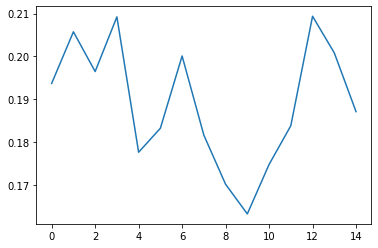

In [19]:
plt.plot(range(0,15), scores)

In [22]:
source = IBD
source.set_distance(source, "hausdorff")

ibd_flow = CustomFlow(ID = 'ibd_analysis',
                    name = "IBD Analysis",
                    time_resolution = DAY,
                    geography = CostaPacificaMunicipalities(),
                    vector_data_sources=[],
                    matrix_data_sources=[IBD],
                    embedder=IdentityEmbbeder(),
                    clusterer=IdentityClusterer()
                    )

ibd_flow.run()

         Starts Flow: IBD Analysis
            Loads Initial Geography
            Loads Data
               Loads Vector Data
               Found 0 elements
               Done
               
               Loads Matrix Data
               Found 1 elements
                  Extracts 1 of 1: Identity by descent (ibd-hausdorff) 
               Done
               ------------------
            Embedds Data
               Found 1 embedders
                  Identity Embedder
            Clusters Data
            Builds Final Geometry
         Flow Ended
         Done
         -----------------


In [23]:
df_ibd = ibd_flow.df_matrix
df_ibd.head()

,date,ID_1,ID_2,ibd-hausdorff_hausdorff
0,2020-01-09,76109,19318,0.229079
1,2020-03-08,76109,27001,0.240190
2,2020-03-08,76109,76109,0.473170
3,2020-04-05,76109,19318,0.316918
4,2020-04-08,76109,19318,0.156280


In [30]:
scores = []
for d in range(0,15):
    # shift movement
    df_fb_tmp = df_fb.copy()
    df_fb_tmp["date"]  = df_fb["date"] + pd.Timedelta(days=d)
    
    df = df_ibd.merge(df_fb_tmp, on=["date", "ID_1", "ID_2"], how="outer").dropna()
    if df.empty:
        print(print(d, "no data"))
        continue

    X = df["ibd-hausdorff_hausdorff"].to_numpy().reshape(-1, 1)
    y = df["fb_mobility_all_movement"].to_numpy()

    reg = LinearRegression().fit(X, y)
    m = reg.coef_
    b = reg.intercept_
    print(d, reg.score(X, y), f"y = {m}x + {b}")
    scores.append(reg.score(X, y))

0 1.0 y = [0.]x + 0.0
1 1.0 y = [0.]x + 0.0
2 1.0 y = [0.]x + 0.0
3 1.0 y = [0.]x + 0.0
4 1.0 y = [0.]x + 0.0
5 1.0 y = [0.]x + 0.0
6 1.0 y = [0.]x + 0.0
7 1.0 y = [0.]x + 0.0
8 1.0 y = [-0.]x + 0.0
9 1.0 y = [-0.]x + 0.0
10 1.0 y = [-0.]x + 0.0
11 1.0 y = [-0.]x + 0.0
12 1.0 y = [-0.]x + 0.0
13 1.0 y = [-0.]x + 0.0
14 1.0 y = [-0.]x + 0.0


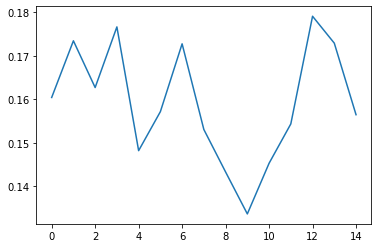

In [26]:
plt.plot(range(0,15), scores)